# Project 1 by Anthony Andreev

Dataset: https://www.kaggle.com/datasets/sniafas/vyronas-database 

In this project, I plan to perform CBIR (Content-based Image Retrieval) on a dataset of different urban buildings from Athens, Greece. Multiple colored photos are taken of every building, with each varying in viewpoint or illumination. I want to read a random image from each building and retrieve 15 pictures that have the same building. Then I will visualize the results.

In [2]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage import io
from skimage.color import rgb2gray
from skimage.feature import match_descriptors, plot_matches, SIFT

In [3]:
# Normalize images shown
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 

# Let's see what the data looks like

In [4]:
# Retrieve data
path = r'C:\Users\Illian\Downloads\project1DB\Vyronasdbmin'
imageList = os.listdir(path)
imageList

['building01_front_cloud.jpg',
 'building01_front_day.jpg',
 'building01_front_noon.jpg',
 'building01_left_cloud.jpg',
 'building01_left_day.jpg',
 'building01_left_noon.jpg',
 'building01_low_cloud.jpg',
 'building01_low_day.jpg',
 'building01_low_noon.jpg',
 'building01_right_cloud.jpg',
 'building01_right_day.jpg',
 'building01_right_noon.jpg',
 'building01_zoom_cloud.jpg',
 'building01_zoom_day.jpg',
 'building01_zoom_noon.jpg',
 'building02_front_cloud.jpg',
 'building02_front_day.jpg',
 'building02_front_noon.jpg',
 'building02_left_cloud.jpg',
 'building02_left_day.jpg',
 'building02_left_noon.jpg',
 'building02_low_cloud.jpg',
 'building02_low_day.jpg',
 'building02_low_noon.jpg',
 'building02_right_cloud.jpg',
 'building02_right_day.jpg',
 'building02_right_noon.jpg',
 'building02_zoom_cloud.jpg',
 'building02_zoom_day.jpg',
 'building02_zoom_noon.jpg',
 'building03_front_cloud.jpg',
 'building03_front_day.jpg',
 'building03_front_noon.jpg',
 'building03_left_cloud.jpg',
 'bu

In [5]:
# Number of images 
len(imageList)

900

In [6]:
# Number of buildings
uniqueBuildings = []
for image in imageList:
    if image[8:10] not in uniqueBuildings:
        uniqueBuildings.append(image[8:10])
len(uniqueBuildings)

60

In [7]:
# Number of images per building
len(imageList) / len(uniqueBuildings)

15.0

In [8]:
i = io.imread(r"C:\Users\Illian\Downloads\project1DB\Vyronasdbmin\building02_left_day.jpg")
i = imNormalize(i)
i = rgb2gray(i)
b = io.imread(r"C:\Users\Illian\Downloads\project1DB\Vyronasdbmin\building02_low_day.jpg")
b = imNormalize(b)
b = rgb2gray(b)

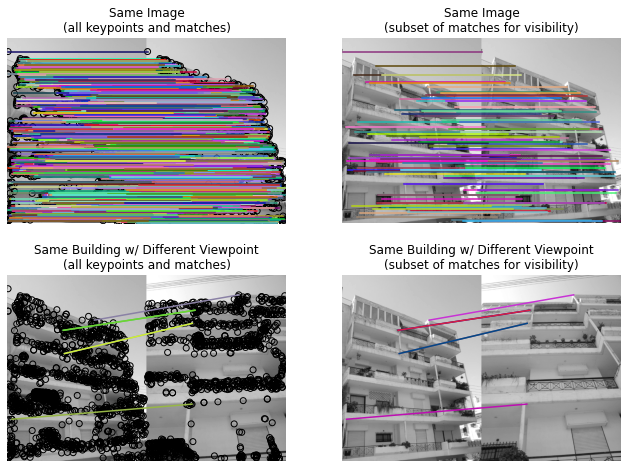

In [15]:
# Visual example of keypoint matching

descriptor_extractor = SIFT()

descriptor_extractor.detect_and_extract(i)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(b)
keypoints2 = descriptor_extractor.keypoints
descriptors2 = descriptor_extractor.descriptors

matches12 = match_descriptors(descriptors1, descriptors1, max_ratio=0.6,
                              cross_check=True)
matches13 = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))

plt.gray()

plot_matches(ax[0, 0], i, i, keypoints1, keypoints1, matches12)
ax[0, 0].axis('off')
ax[0, 0].set_title("Same Image\n"
                   "(all keypoints and matches)")

plot_matches(ax[1, 0], i, b, keypoints1, keypoints2, matches13)
ax[1, 0].axis('off')
ax[1, 0].set_title("Same Building w/ Different Viewpoint\n"
                   "(all keypoints and matches)")

plot_matches(ax[0, 1], i, i, keypoints1, keypoints1, matches12[::15],
             only_matches=True)
ax[0, 1].axis('off')
ax[0, 1].set_title("Same Image\n"
                   "(subset of matches for visibility)")

plot_matches(ax[1, 1], i, b, keypoints1, keypoints2, matches13,
             only_matches=True)
ax[1, 1].axis('off')
ax[1, 1].set_title("Same Building w/ Different Viewpoint\n"
                   "(subset of matches for visibility)")

plt.show()

In [16]:
# Number of keypoints in first image
len(keypoints1)

1421

In [17]:
# Array of matching keypoints between first image and itself
matches12

array([[   0,    0],
       [   1,    1],
       [   2,    2],
       ...,
       [1418, 1418],
       [1419, 1419],
       [1420, 1420]], dtype=int64)

In [18]:
# Number of keypoints in second image
len(keypoints2)

1044

In [19]:
# Descriptors for first keypoint in first image
descriptors1[0]

array([  2,   0,   0,   0,   0,   0,   0,   5,  15,   0,   0,   0,   0,
         0,   0,  14,  26,   9,   3,   0,   0,   0,   0,  22,   6,  31,
        72,   0,   0,   0,   0,   0, 165,   0,   0,   0,   0,   0,   0,
        72, 165,   1,   0,   0,   0,   0,   0,  82, 165,  44,   4,   0,
         0,   0,   0, 112, 165, 165, 108,   0,   0,   0,   0,   2, 116,
         0,   0,   0,   0,   0,   0,   9, 165,   2,   0,   0,   0,   0,
         0,   8, 165,   7,   0,   0,   0,   0,   0,  15,  87,  46,   0,
         0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=uint8)

In [39]:
# Extract descriptors from every image

descriptorsArr = []
i = 0
for image in imageList:
    image = io.imread(path + '\\' + image)
    image = imNormalize(image)
    image = rgb2gray(image)
    descriptor_extractor.detect_and_extract(image)
    descriptors1 = descriptor_extractor.descriptors
    descriptorsArr.append(descriptors1) 
    i += 1
    if i == 90:
        break

In [40]:
# Finding the 15 closest matches for each building

retrievalArr = []    
queryIndex = 0
for buildingNum in range(6):  
    matchesArr = []
    descriptors1 = descriptorsArr[queryIndex]
    for descriptor in descriptorsArr:
        descriptors2 = descriptor
        matches = match_descriptors(descriptors1, descriptors2, max_ratio=0.6,
                              cross_check=True)
        matchesArr.append(len(matches))
    matchesArr = np.argsort(matchesArr)[::-1]
    matchesArr = matchesArr[:15]
    matchesArr = matchesArr.tolist()
    matchesArr.insert(0, queryIndex)
    retrievalArr.append(matchesArr)
    queryIndex += 16

In [41]:
retrievalArr = np.array(retrievalArr)
retrievalArr.shape

(6, 16)

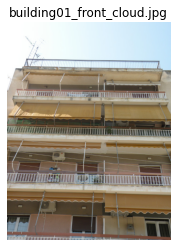

In [42]:
# First building query image

queryImg1 = io.imread(path + '\\' + imageList[retrievalArr[0, 0]])
plt.imshow(queryImg1)
plt.title(imageList[retrievalArr[0, 0]])
plt.axis("off")
plt.show()

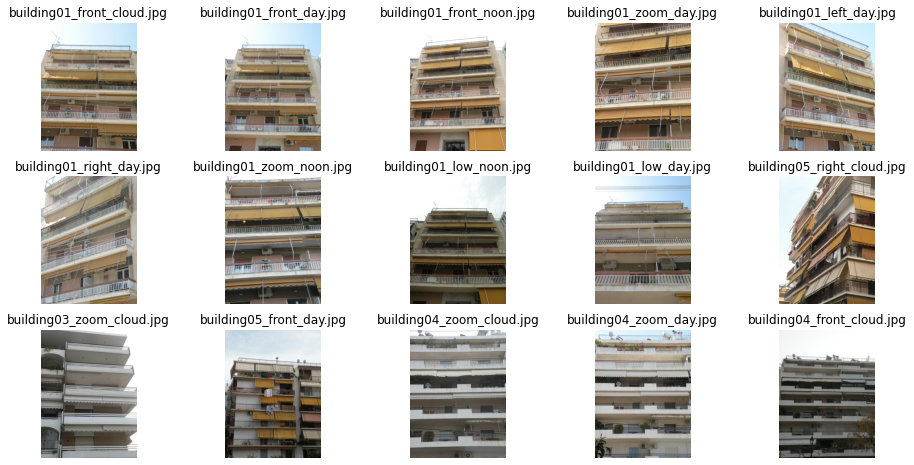

In [43]:
# 15 closest matches

fig = plt.figure(figsize=(16, 8))
i = 0
for col in range(1, retrievalArr.shape[1]):
    image = io.imread(path + '\\' + imageList[retrievalArr[0, col]])
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(image)
    plt.title(imageList[retrievalArr[0, col]])
    ax.axis('off')
    i += 1
plt.show()

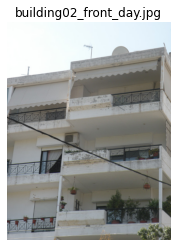

In [44]:
# Second building query image

queryImg2 = io.imread(path + '\\' + imageList[retrievalArr[1, 0]])
plt.imshow(queryImg2)
plt.title(imageList[retrievalArr[1, 0]])
plt.axis("off")
plt.show()

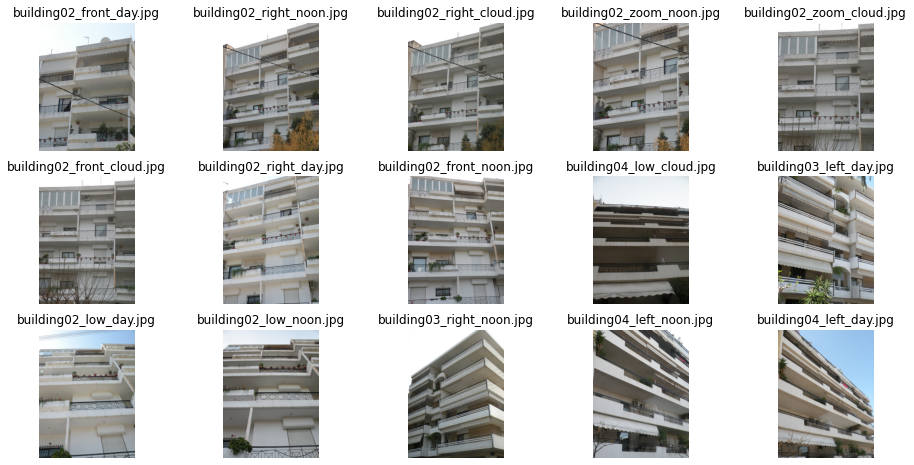

In [45]:
# 15 closest matches

fig = plt.figure(figsize=(16, 8))
i = 0
for col in range(1, retrievalArr.shape[1]):
    image = io.imread(path + '\\' + imageList[retrievalArr[1, col]])
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(image)
    plt.title(imageList[retrievalArr[1, col]])
    ax.axis('off')
    i += 1
plt.show()

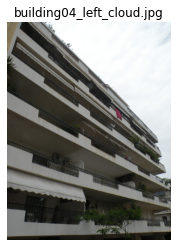

In [46]:
# 3rd building query image

queryImg3 = io.imread(path + '\\' + imageList[retrievalArr[3, 0]])
plt.imshow(queryImg3)
plt.axis("off")
plt.title(imageList[retrievalArr[3, 0]])
plt.show()

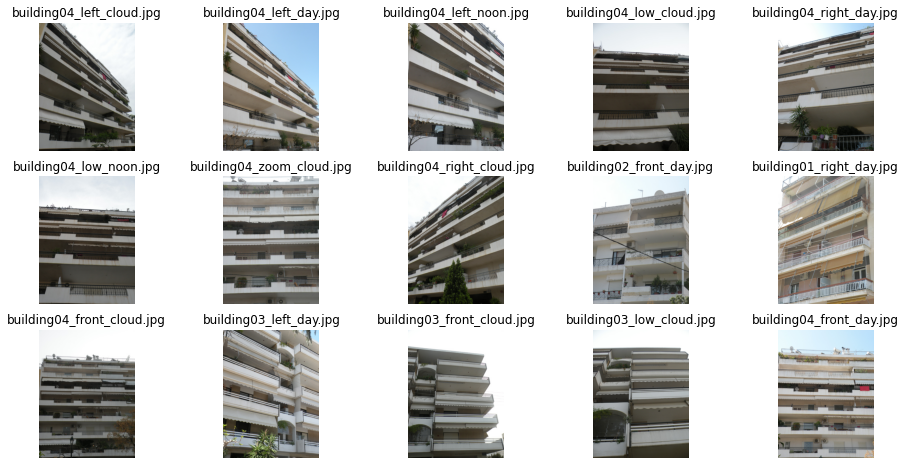

In [47]:
# 15 closest matches

fig = plt.figure(figsize=(16, 8))
i = 0
for col in range(1, retrievalArr.shape[1]):
    image = io.imread(path + '\\' + imageList[retrievalArr[3, col]])
    ax = fig.add_subplot(3,5,i+1)
    ax.imshow(image)
    plt.title(imageList[retrievalArr[3, col]])
    ax.axis('off')
    i += 1
plt.show()

In [48]:
# Initializing variables 

overallSuccessNum = 0
leftSuccessNum = 0
frontSuccessNum = 0
cloudSuccessNum = 0
daySuccessNum = 0
noonSuccessNum = 0

In [49]:
# Counting success values for each building condition

for row in range(retrievalArr.shape[0]):
    queryImg = imageList[retrievalArr[row, 0]]
    for col in range(1, retrievalArr.shape[1]):
        image = imageList[retrievalArr[row, col]]
        if image[8:10] == queryImg[8:10]:
            overallSuccessNum += 1
            if "left" in queryImg:
                leftSuccessNum += 1
            if "front" in queryImg:
                frontSuccessNum += 1
            if "cloud" in queryImg:
                cloudSuccessNum += 1
            if "day" in queryImg:
                daySuccessNum += 1
            if "noon" in queryImg:
                noonSuccessNum += 1

In [50]:
# Computing success rates

overallSuccessRate = overallSuccessNum / 90
leftSuccessRate = leftSuccessNum / 45
frontSuccessRate = frontSuccessNum / 45
cloudSuccessRate = cloudSuccessNum / 30
daySuccessRate = daySuccessNum / 30
noonSuccessRate = noonSuccessNum / 30

In [51]:
# Decent result

overallSuccessRate

0.6

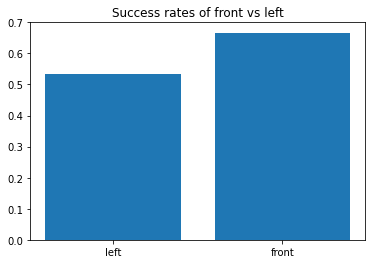

In [52]:
# Bar chart

plt.bar(['left','front'],[leftSuccessRate,frontSuccessRate])
plt.title('Success rates of front vs left')
plt.show()

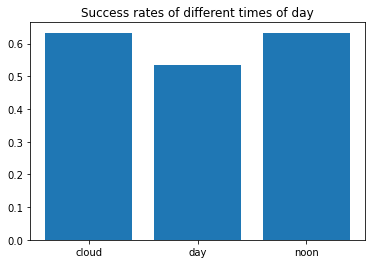

In [53]:
# Bar chart

plt.bar(['cloud','day','noon'],[cloudSuccessRate,daySuccessRate,noonSuccessRate])
plt.title('Success rates of different times of day')
plt.show()